<a href="https://colab.research.google.com/github/humayun-mhk/Internship-AI-NLP-Projects-/blob/main/Customer_Segmentation_Using_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

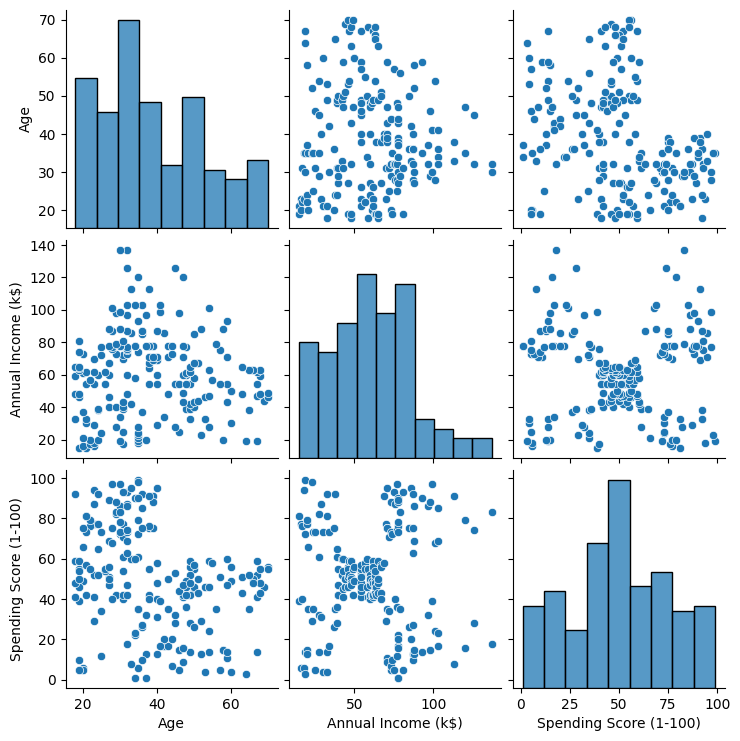

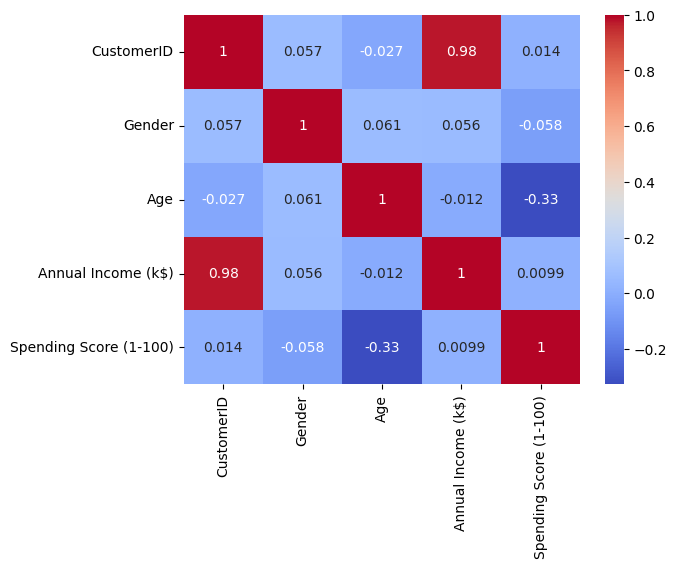

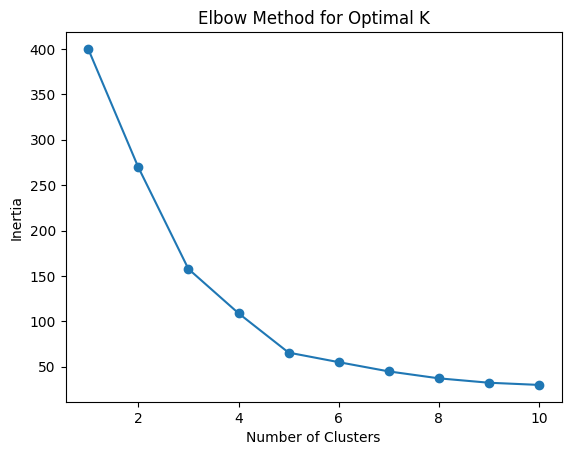

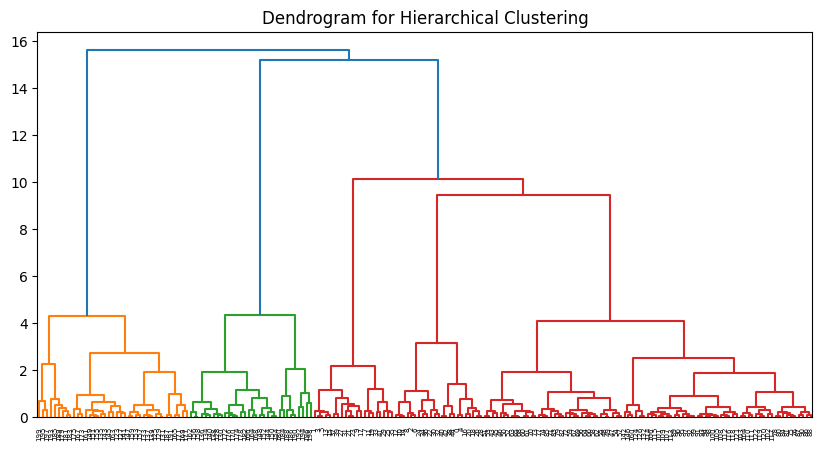

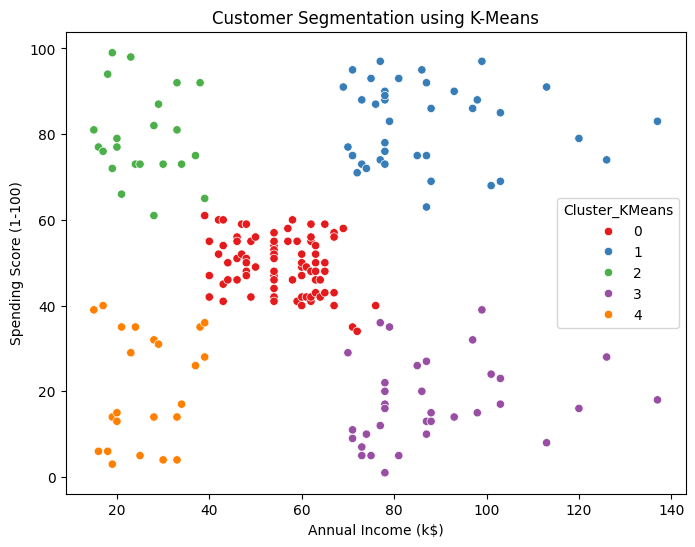

                CustomerID    Gender        Age  Annual Income (k$)  \
Cluster_KMeans                                                        
0                86.320988  0.407407  42.716049           55.296296   
1               162.000000  0.461538  32.692308           86.538462   
2                23.090909  0.409091  25.272727           25.727273   
3               164.371429  0.542857  41.114286           88.200000   
4                23.000000  0.391304  45.217391           26.304348   

                Spending Score (1-100)  Cluster_HC  
Cluster_KMeans                                      
0                            49.518519    2.000000  
1                            82.128205    1.000000  
2                            79.363636    2.954545  
3                            17.114286    0.171429  
4                            20.913043    4.000000  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Step 1: Load Dataset
df = pd.read_csv("/content/Mall_Customers.csv")  # Ensure the dataset is in the working directory
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)
print(df.info())  # Check data types and missing values
print(df.describe())
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
# Visualizations
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 3: Data Preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values  # Selecting relevant features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4A: K-Means Clustering - Finding Optimal Clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with Optimal K (Assume K=5 from the Elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Step 4B: Hierarchical Clustering - Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5)
df['Cluster_HC'] = hc.fit_predict(X_scaled)

# Step 5: Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_KMeans'], palette='Set1')
plt.title('Customer Segmentation using K-Means')
plt.show()

# Step 6: Interpretation and Insights
cluster_means = df.groupby('Cluster_KMeans').mean()
print(cluster_means)
